In [394]:
library(MASS)  # library including the Boston datasets
data<-as.matrix(Boston)
head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [395]:
#Structure of dataset
str(data) 

 num [1:506, 1:14] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:506] "1" "2" "3" "4" ...
  ..$ : chr [1:14] "crim" "zn" "indus" "chas" ...


In [396]:
#Dividing the columns of data in Y(as response) and X(as predictor)
Y=data[,ncol(data)]    #Response
#Number of obserbvation's in respose 
length(Y)
X=data[,-ncol(data)]   #Predictor Matrix

[1] 506

In [397]:
#Predictor matrix including intercept term
X=cbind(rep(1,nrow(X)),X) 
#dimension of predictor matrix 
dim(X)
colnames(X)[1]="intercept"
#standardising the regressor of datasets
for(i in 2:ncol(X))
{
  X[,i]=(X[,i]-mean(X[,i]))/sd(X[,i])
}
# set.seed() will help to select the same random sample  whenever  we select a random #sample from data
set.seed(52)
#Selecting 100 random sample from total observation
indices=sample(1:nrow(data),replace=FALSE,100)
j=which(colnames(X)=="zn")
k=which(colnames(X)=="chas")
l=which(colnames(X)=="rad")
#removing columns of ZN,CHAS,RAD from X(Predictor matrix) 
X=X[,-c(j,k,l)]  

[1] 506  14

In [398]:
# Setting up  training set(406 observation) and test set(100 observation) data Selected from whole data
Y_train=(Y[-indices])
X_train=(X[-indices,])
#observations in train datasets
dim(X_train);length(Y_train)
Y_test=Y[indices]
X_test=(X[indices,])
#observation in test dataset
dim(X_test);length(Y_test)

[1] 406  11

[1] 406

[1] 100  11

[1] 100

In [399]:
det(t(X_train)%*%X_train)
#determinant of (t(X_train)%*%X_train) is not zero . 
#Hence we conclude the matrix is full column rank matrix

[1] 1.036169e+26

In [400]:
beta_hat=solve(t(X_train)%*%X_train)%*%t(X_train)%*%Y_train
beta_hat 
# estimated value of the  mean housing price of testing data 
Y_test_cap=X_test%*%beta_hat          
#RMSE Value of the testing the datasets
RMSE=sqrt(sum((Y_test-Y_test_cap)^2))/sqrt(length(Y_test))
cat("RMSE value for model is ",RMSE)

intercept,22.3175204
crim,-0.3813723
indus,-0.7324612
nox,-1.6718780
rm,2.4131685
age,-0.2408388
dis,-2.4910960
tax,0.3467440
ptratio,-2.1871680
black,0.6728200
lstat,-3.7625047


RMSE value for model is  5.9042

In [401]:
##(1)---Diagnosis of leverage and influential observations----
#1(a).To find leverage point and drop those using suitable threshold
n=nrow(X_train);p=ncol(X_train)
#thred is thethreshold above which the points are cosidered as leverage point 
thred=2*p/n   
Htr=as.matrix(X_train%*%solve(t(X_train)%*%X_train)%*%t(X_train))
h_ii=diag(Htr)
indices=which(h_ii>thred) # 31 leverage points
length(indices)
#Removing the leverage point from data
Y_train=Y_train[-indices]
X_train=X_train[-indices,]
#Observations left after removal of leverage point from training set
dim(X_train);length(Y_train)


[1] 31

[1] 375  11

[1] 375

In [402]:
##COOK'S DISTANCE
n=nrow(X_train);p=ncol(X_train)
#'beta_hat1' is Least square solution after removal of leverage point 
beta_hat1=solve(t(X_train)%*%X_train)%*%t(X_train)%*%Y_train     
#'Htr' is hat matrix
Htr=X_train%*%solve(t(X_train)%*%X_train)%*%t(X_train)
h=diag(Htr)
Y_train_cap=X_train%*%beta_hat1
res=Y_train-Y_train_cap
MSres=sum(res^2)/(n-p)
C=((res^2)*h)/(MSres*p*((1-h)^2))
which(C>1) #indicates influential point 
#thus we do not get influential point as per Cook's Distance for this data #set

integer(0)

In [403]:
#DFFIT
#'RSSi' vector of residual after removing ith obseravation from training data
RSSi=sum(res^2)-(res^2/1-h)
#'MSresi' Estimate of error variance after removing ith observation
MSresi=RSSi/(n-1-p)
#'DFFits' is change the predicted response after removing ith observation 
DFFits=(res*sqrt(h))/(sqrt(MSresi)*(1-h))
# 'a' is Influencial observation on the basis of DFFits
a=which(abs(DFFits)>2*sqrt(p/n))
length(a)

[1] 28

In [404]:
#DFBETA
DFBETAs_ji=matrix(data=NA,nrow=n,ncol=p-1)
Cd=solve(t(X_train)%*%X_train)%*%t(X_train)
for(j in 1:p-1)
{
  DFBETAs_ji[,j]=(Cd[j+1,]*res)/(sqrt(sum(Cd[j+1,]^2)*MSresi)*(1-h))
}
influence_DFBETA=NA
for(j in 2:p)
{
  influence_DFBETA=c(influence_DFBETA ,which(abs(DFBETAs_ji[,j-1])>2/sqrt(n)) )
} 
b = as.numeric (names (which( table(na.omit(influence_DFBETA))>=7 ) ) )
length(b)
# b is index of influential point based on DFBETAs_ji

[1] 5

In [405]:
#COVRATIO
#cov_ratio helps to compare model accuracy when ith observation is removed 
#whether accuracy improved or not after removing the ith observation
cov_ratio=(MSresi/MSres)^p/(1-h)
#'c' is influential observation on the basis of cov_ratio
c=which(abs(cov_ratio-1)>3*p/n)
length(c)

[1] 28

In [406]:
# Now taking all of the unique influential observaion's we get on the basis #of DFFITs,DFBETA , COV RATIO
a;b;c
z=unique(c(a,b,c))
length(z)
z
#Removing influential observation from the trainin data  
Y_train=Y_train[-z]
X_train=X_train[-z,]

# observation left after removing leverage and influntial point from data
dim(X_train);length(Y_train)

[1]   5  52 113 114 128 151 164 169 191 196 207 253 269 270 271 272 273 277 280
[20] 294 296 297 299 301 302 304 342 375

[1] 113 114 270 271 272

[1]  79 104 105 106 107 108 109 113 114 128 169 253 260 261 270 271 273 282 294
[20] 296 300 301 303 309 310 319 364 375

[1] 44

[1]   5  52 113 114 128 151 164 169 191 196 207 253 269 270 271 272 273 277 280
[20] 294 296 297 299 301 302 304 342 375  79 104 105 106 107 108 109 260 261 282
[39] 300 303 309 310 319 364

[1] 331  11

[1] 331

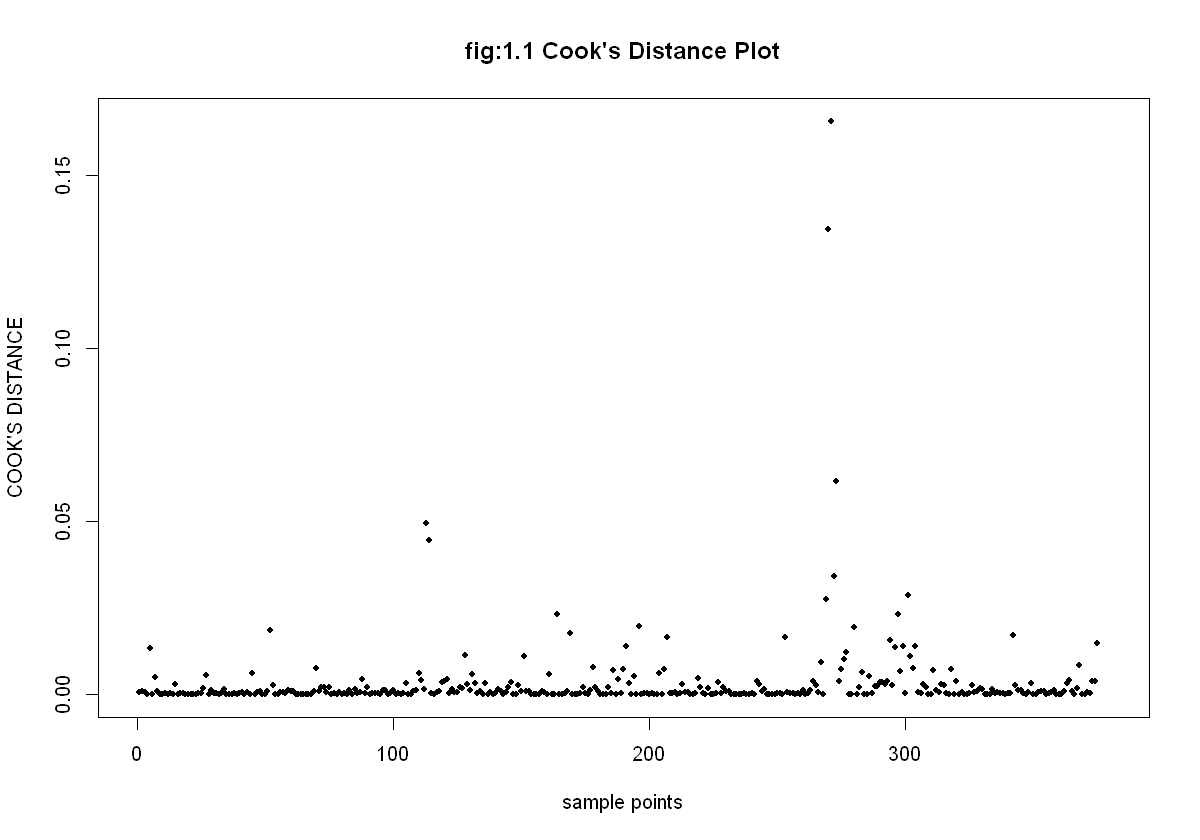

In [407]:
#1(c)PLOTTING 
#Cook's distance plotting 
plot(C,xlim=c(0,380),xlab="sample points",ylab="COOK'S DISTANCE",main="fig:1.1 Cook's Distance Plot",col=(C>1)+1,pch=20)


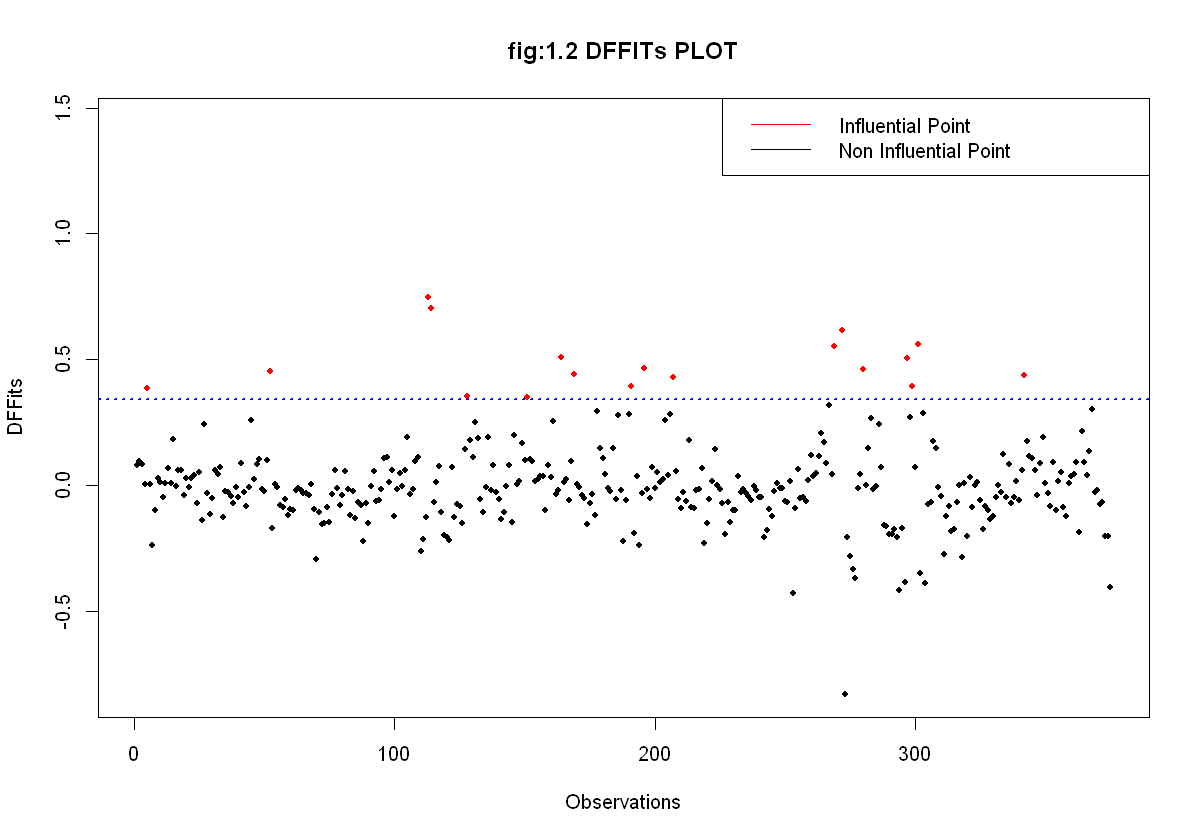

In [408]:
##DFFits plotting
plot(DFFits,xlab='Observations',col=(DFFits>(2*sqrt(p/n)))+1,main='fig:1.2 DFFITs PLOT',pch=20)
abline(h=2*sqrt(p/n),col='blue',lwd=2,lty='dotted')
legend("topright",c("Influential Point","Non Influential Point"),col=c("red","black"),lwd=0.2)


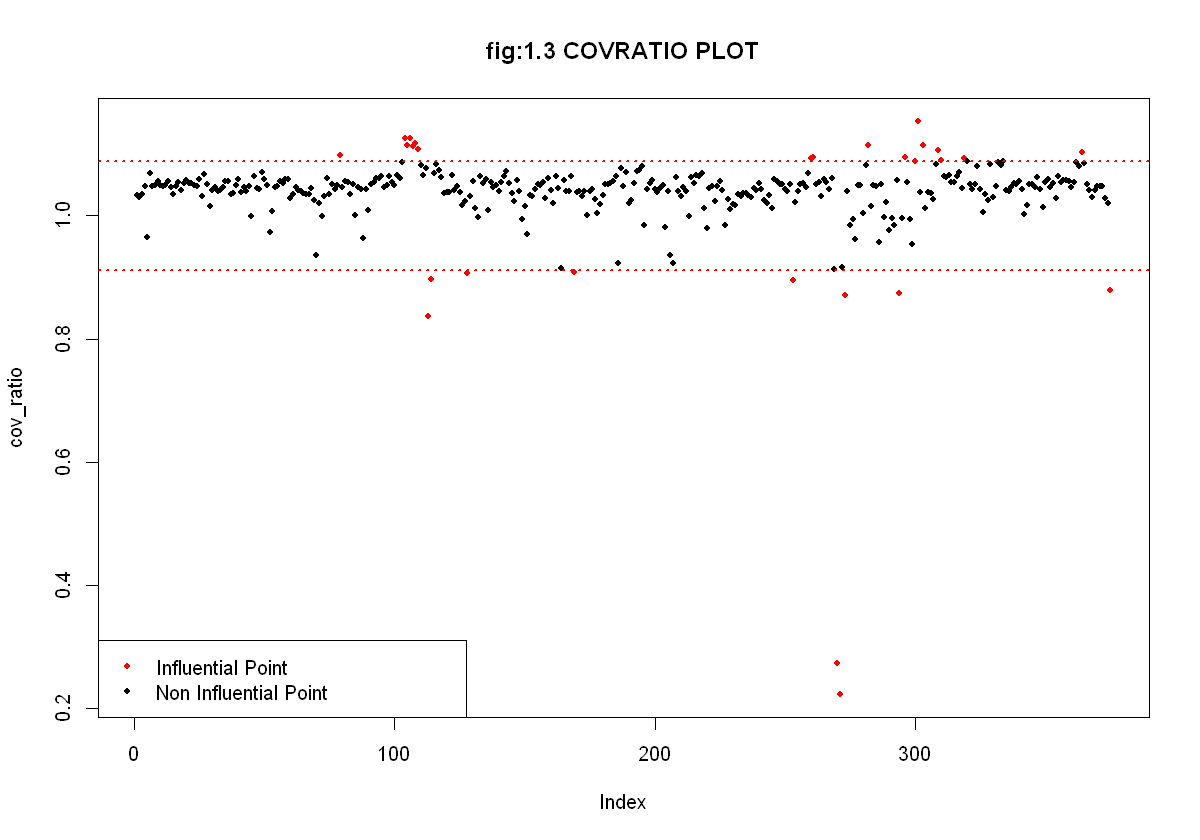

In [409]:
##Covariance ratio plotting
plot(cov_ratio,main="fig:1.3 COVRATIO PLOT",col=(abs(cov_ratio-1)>3*p/n)+1, pch=20)
abline(h=c( 3*p/n +1, -(3*p/n)+1) , col="red", lwd=2, lty="dotted")
legend("bottomleft",c("Influential Point","Non Influential Point"),col=c("red","black"),pch=20)

In [410]:
#1.(d) Calculating RMSE again 
#Least square solution after removing of leverage and influential point
beta_hat2=solve(t(X_train)%*%X_train)%*%t(X_train)%*%Y_train   
# estimated value of the  mean housing price of testing data 
Y_test_cap=X_test%*%beta_hat1          
#RMSE Value of the testing the datasets
RMSE_new=sqrt(sum((Y_test-Y_test_cap)^2))/sqrt(length(Y_test))
RMSE;RMSE_new
if(RMSE_new<RMSE){RMSE=RMSE_new}
#RMSE_new is less than RMSE .so , the effect of leverage and Outliers is #diagnoised successfully.

[1] 5.9042

[1] 5.698279

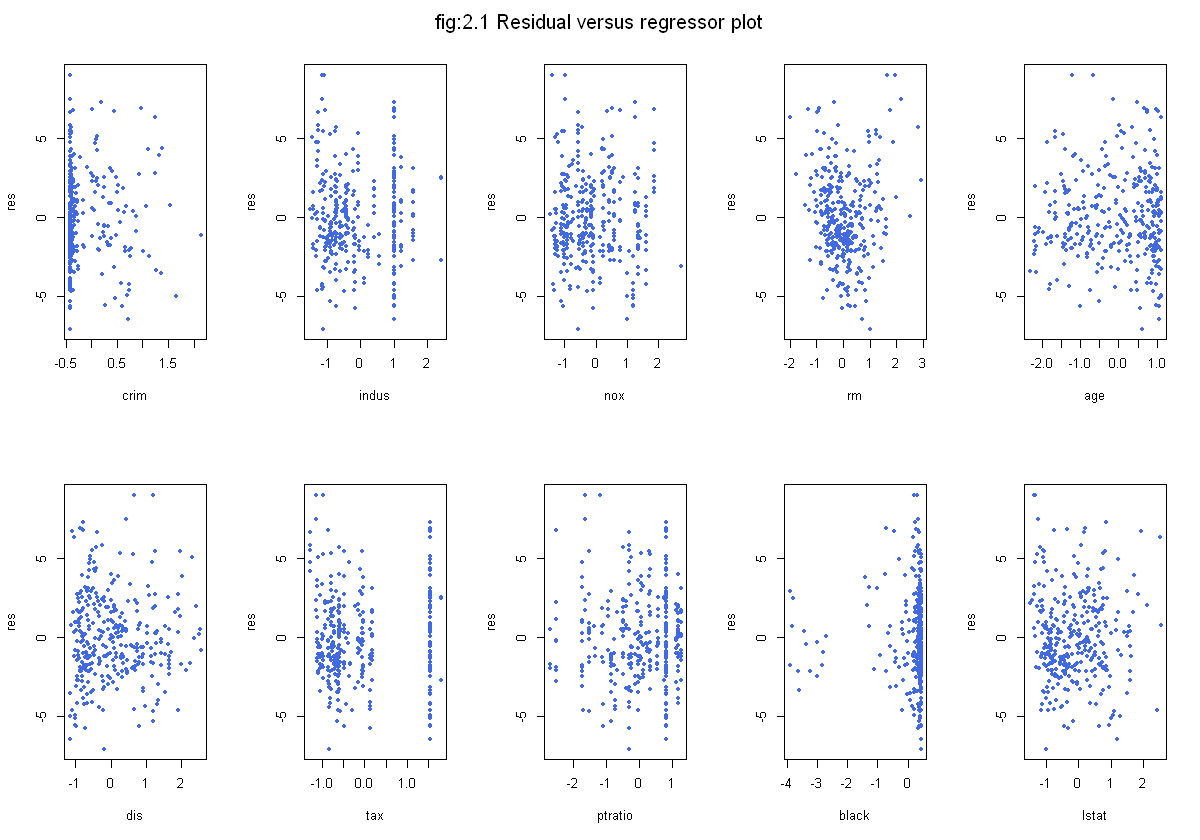

In [411]:
##(2)---Dealing-with-curvatures-------------------------------------
#2(a)
n=nrow(X_train) ; p=ncol(X_train)
res=(Y_train-X_train%*%beta_hat2)
par(mfrow=c(2,(p-1)/2))
for(i in 2:ncol(X_train))
{
  plot(X_train[,i],res,xlab=colnames(X_train)[i],ylab="res",col='royalblue',pch=20)
}
mtext("fig:2.1 Residual versus regressor plot",line=-2 ,outer=TRUE)
#from the observation of res v\s regresor plot we seem "rm" not to be #linearly related with E(y)

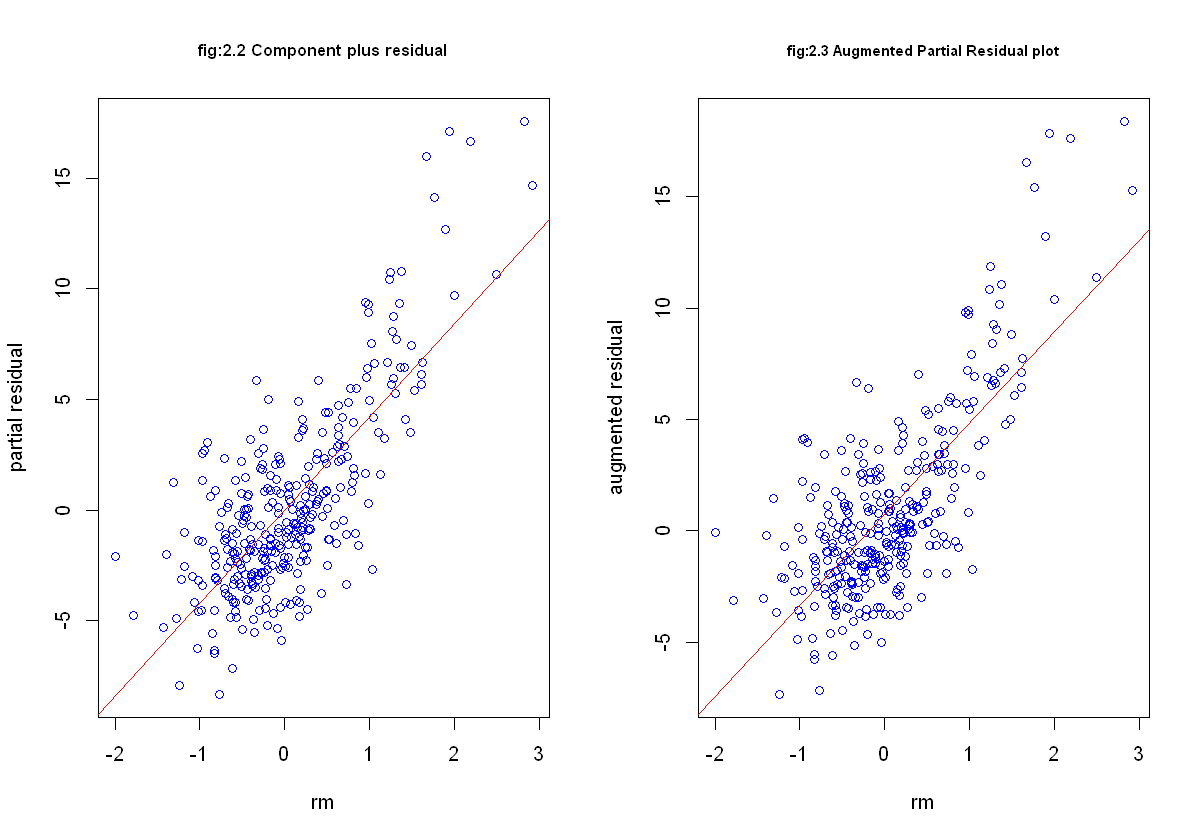

In [412]:
#2(b)Plotting 'rm' regressor with CPR(component plus residual)
par(mfrow=c(1,2))
l=which(colnames(X_train)=="rm")
#'cpr' is the component plus residual 
cpr=res+beta_hat2[l]*X_train[,l]
#plotting the 'rm' V\S CPR
plot(X_train[,l],cpr,xlab="rm",ylab="partial residual",cex.main=0.85,main="fig:2.2 Component plus residual",col="blue")
#Setting for drawing slope in 'rm' V/s cpr plot
Y_train_new=cpr
X_train_new=cbind(rep(1,n),X_train[,l])
coef=solve(t(X_train_new)%*%X_train_new)%*%t(X_train_new)%*%Y_train_new
abline(a=coef[1],b=coef[2],col="red")

#plotting 'rm' with APR(Augmented Partial Residual )   
X_train_apr=cbind(X_train,X_train[,l]^2)
Y_train_apr=Y_train
beta_hat_apr=solve(t(X_train_apr)%*%X_train_apr)%*%t(X_train_apr)%*%Y_train_apr
res_apr=Y_train_apr-X_train_apr%*%beta_hat_apr
apr=res_apr+beta_hat_apr[l]*X_train[,l]+beta_hat_apr[length(beta_hat_apr)]*(X_train[,l]^2)
plot(X_train[,l],apr,cex.main=0.75,
     main="fig:2.3 Augmented Partial Residual plot",xlab="rm",
     ylab="augmented residual", col="blue")
#Setting for drawing slope in 'rm' V/S APR(Augmented Partial Residual) Plot
Y_train_apr=apr
X_train_apr=cbind(rep(1,n),X_train[,l])
coef=solve(t(X_train_apr)%*%X_train_apr)%*%t(X_train_apr)%*%Y_train_apr
abline(a=coef[1],b=coef[2],col="red")


In [413]:
#2(c)Observing CPR and APR plot. We suggest that the exponential #transformation is needed for the regressor 'rm'
#Our transformed model for 'rm' is  g(x)=beta0*exp(beta1*Xtr_rm)
#Fitting the transformed model 
X_train_rm=cbind(rep(1,n),X_train[,l])
Y_train_rm=Y_train
beta_hat_rm=solve(t(X_train_rm)%*%X_train_rm)%*%t(X_train_rm)%*% log(Y_train_rm)
trans_rm= exp(beta_hat_rm[1])*exp(beta_hat_rm[2]*X_train[,l])

In [414]:

##2(d). to find partial coefficient between Ytrain and "rm" of Xtrain
X_train_dd=X_train[,-l]
uu=lm(Y_train~X_train_dd)
res1=uu$residuals
vv=lm(X_train[,l]~X_train_dd)
res2=vv$residuals
#Correlation coefficient without any transformation
par_Cor=cor(res1,res2)
par_Cor
## to find partial coefficient between Ytrain and g(x)
ww=lm( trans_rm ~X_train_dd)
res2=ww$residuals
#Correlation coefficient after transformation
par_Cor_trans= cor(res1,res2)
par_Cor_trans
##there is increase in  correlation coefficient ,
#thus we keep the  transformation of 'rm' and conclude that linearity has #improved
#Replacing the transformed 'rm' with 'rm' in train dataset
X_train[,l]=trans_rm
colnames(X_train)[l]='transformed_rm'
colnames(X_train)
#Estimated coefficient after transformation of model fit 
beta_hat=solve(t(X_train)%*%X_train)%*%t(X_train)%*% Y_train
#Replacing the transformed 'rm' with 'rm' in train dataset
Xts1=X_test
Xts1[,l]= exp(beta_hat_rm[1])* exp(beta_hat_rm[2]*X_test[,l])
X_test=Xts1

[1] 0.6289756

[1] 0.6853392

[1] "intercept"      "crim"           "indus"          "nox"           
 [5] "transformed_rm" "age"            "dis"            "tax"           
 [9] "ptratio"        "black"          "lstat"

In [415]:
#2(e)
RSS= sum((Y_test-X_test%*%beta_hat)^2)
#Calculation of RMSE after transformation of 'rm'
RMSE_trans=sqrt(RSS/length(Y_test))
RMSE_trans ; RMSE
if(RMSE_trans<RMSE){RMSE=RMSE_trans}
RMSE
#from the result we get that RMSE_trans is less than RMSE .
#thus transformation has  improved linearity of the residual . 

[1] 5.128485

[1] 5.698279

[1] 5.128485

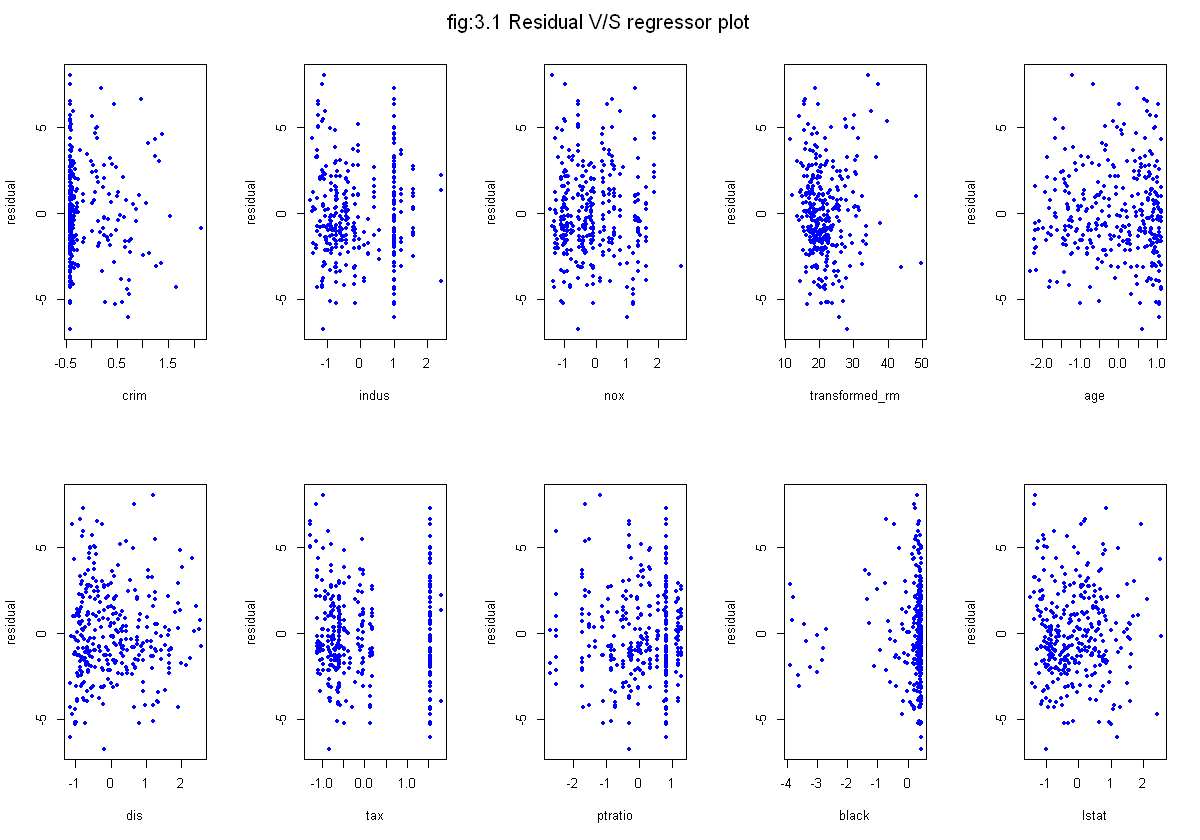

In [416]:
##(3)---Dealing with problem of Hetroscedasticity------------
#3(a)
res=(Y_train-X_train%*%beta_hat)
par(mfrow=c(2,(p-1)/2))
for(i in 2:p)
{
  plot(X_train[,i],res,xlab=colnames(X_train)[i],ylab="residual", pch=20, col="blue")
}
mtext("fig:3.1 Residual V/S regressor plot",line=-2 ,outer=TRUE)

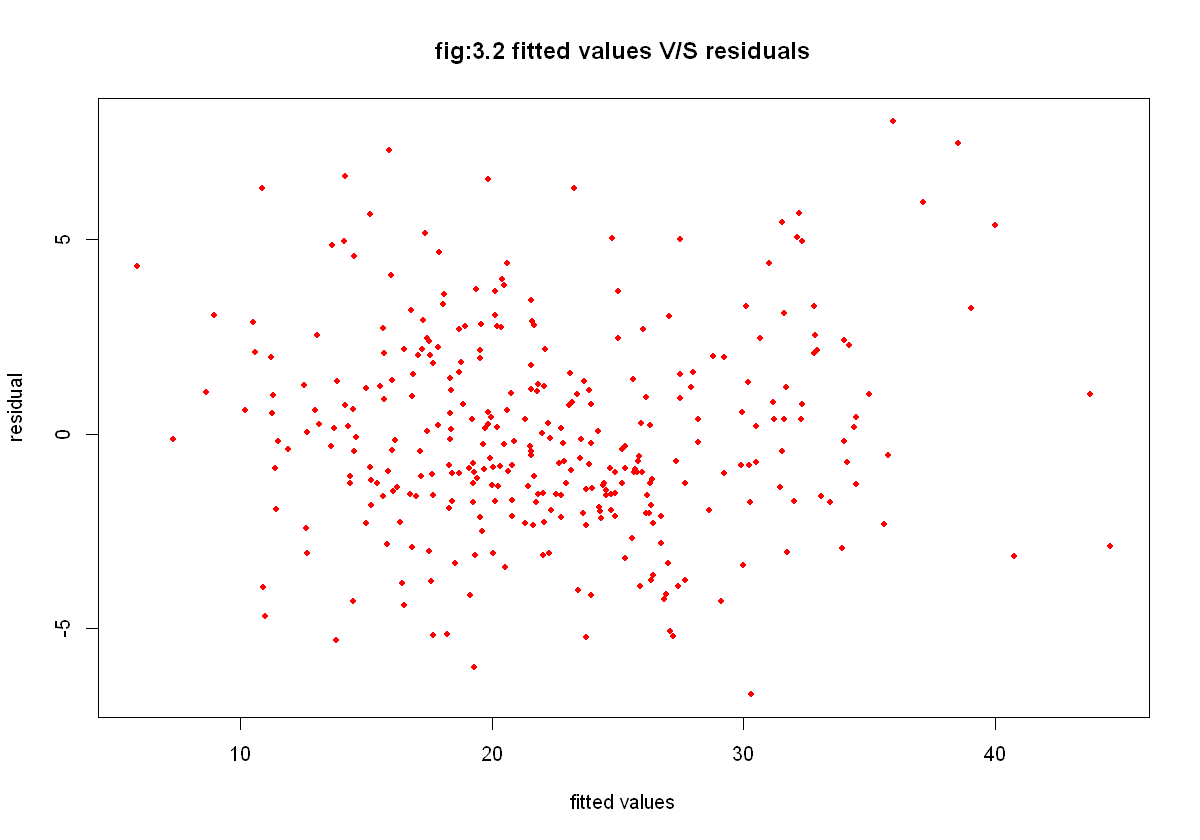

In [417]:
Y_train_cap=X_train%*%beta_hat
plot(Y_train_cap,res,xlab="fitted values",ylab="residual",main="fig:3.2 fitted values V/S residuals",col="red",pch=20)

# Examining the plot of residuals V/S regressor and residual V/S fitted #values,we claim that crim, indus, age, dis, tax, black produce #heteroscedasticity

In [418]:

#3(b) Performing Breusch Pagan Test to test the heteroscedasticity claim    #Ho: Error variance are homoscedastic in nature
#H1: Error variance are Heteroscedastic in nature
di=(n*res^2)/sum(res^2)
Ztr=X_train[,which(colnames(X_train)=='intercept'|colnames(X_train)=='crim'|colnames(X_train)=='indus'|colnames(X_train)=='age'|
                     colnames(X_train)=='dis'| colnames(X_train)=='tax'|colnames(X_train)=='black')]
di_hat=Ztr%*% solve(t(Ztr)%*%Ztr) %*% t(Ztr)%*%di
R_2=(cov(di,di_hat))^2/(var(di)*var(di_hat))
#Test Stastic under the assumption of null hypothesis
Q=n*R_2
print(Q)
#Critical Value
c= qchisq(0.95,6)
print(c)
#Decision Rule
if(Q>c) print("reject H0:(homoscedasticity assumption)") else
  print("accept H0:(homoscedasticity assumption)")

         [,1]
[1,] 16.44206
[1] 12.59159
[1] "reject H0:(homoscedasticity assumption)"


In [419]:
#3(c)
#As test rejects the homoscedastic assumption .
#Performing Iterative method to estimate the coefficients

I=0
beta_hat=solve(t(X_train)%*%X_train)%*%(t(X_train)%*%Y_train)
res=Y_train- X_train%*%beta_hat
alpha= solve(t(Ztr)%*% Ztr) %*%t(Ztr)%*% res^2
alpha_1=NA
repeat{
  beta_hat_aux=beta_hat
  alpha_1= alpha
  sig= Ztr %*% alpha_1
  sigma=diag(as.vector(sig))
  beta_hat=solve(t(X_train)%*% solve(sigma) %*%X_train)%*% t(X_train)%*% solve(sigma)%*% Y_train
  res= Y_train- X_train%*%beta_hat
  alpha= solve(t(Ztr)%*% Ztr) %*%t(Ztr)%*% res^2
  I=I+1
  if((sum((beta_hat_aux-beta_hat)^2)<=0.1 & sum((alpha_1-alpha)^2)<=0.1)| I>200)
  {      break   }
}
#3(d)Calculating fitted model coefficient after removing the effect of #heteroscedasticity with transformation
RSS= sum((Y_test-X_test%*%beta_hat)^2)
RMSE_new=sqrt(RSS/length(Y_test))
RMSE; RMSE_new
# decrease in RMSE
if(RMSE_new<RMSE){RMSE=RMSE_new}
cat("RMSE after heteroscedasticity diagnostic",RMSE)


[1] 5.128485

[1] 5.106228

RMSE after heteroscedasticity diagnostic 5.106228


	Shapiro-Wilk normality test

data:  Y_train
W = 0.9669, p-value = 7.45e-07


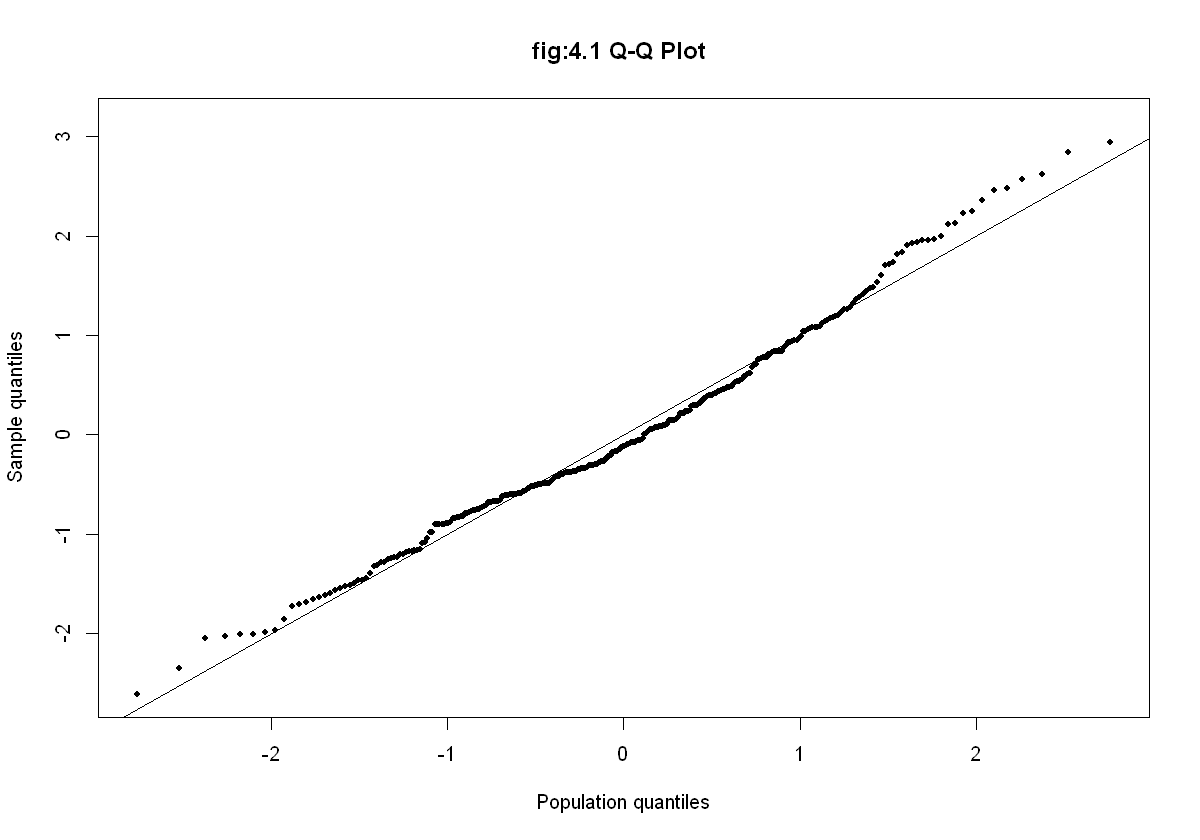

In [420]:
##(4)---Diagnosing the normality assumption--------------------
#4(a)
#qq.plot() function can plot quantile quantile plot
#input variable is predictor matrix and response vector 
qq.plot=function(Z,y,text)    
{
  n=nrow(Z)
  p=ncol(Z)-1
  H=Z%*%solve(t(Z)%*%Z)%*%t(Z) 
  #predicted value of y
  y_cap=H%*%y
  #vector of residuals
  res=y-y_cap   
  RSS=sum(res^2)  
  RSS_i=rep(0,n)  
  for(i in 1:n)
  {
    RSS_i[i]=RSS-((res[i]^2)/(1-H[i,i]))
  }
  #'r_i' is R-Studentized residuals
  r_i=rep(0,n)    
  for(i in 1:n)
  {
    r_i[i]=res[i]/(sqrt(RSS_i[i]*(1-H[i,i])/(n-p-1)))
  }
  #ordered R-Student residuals
  r_i.ord=sort(r_i)  
  #'p_i' is vector of population quantiles of t(n-p-1) distn 
  p_i=rep(0,n)  
  for(i in 1:n)
  {
    p_i[i]=qt(i/n,n-p-1)
  }
  plot(p_i,r_i.ord,pch=20,main=text,xlab="Population quantiles",ylab="Sample quantiles")
  #straight line with intercept 0, slope 1 drawn to make inferences
  abline(a=0,b=1)
}
qq.plot(X_train,Y_train,"fig:4.1 Q-Q Plot ")
shapiro.test(Y_train)


named numeric(0)

[1] 0.6

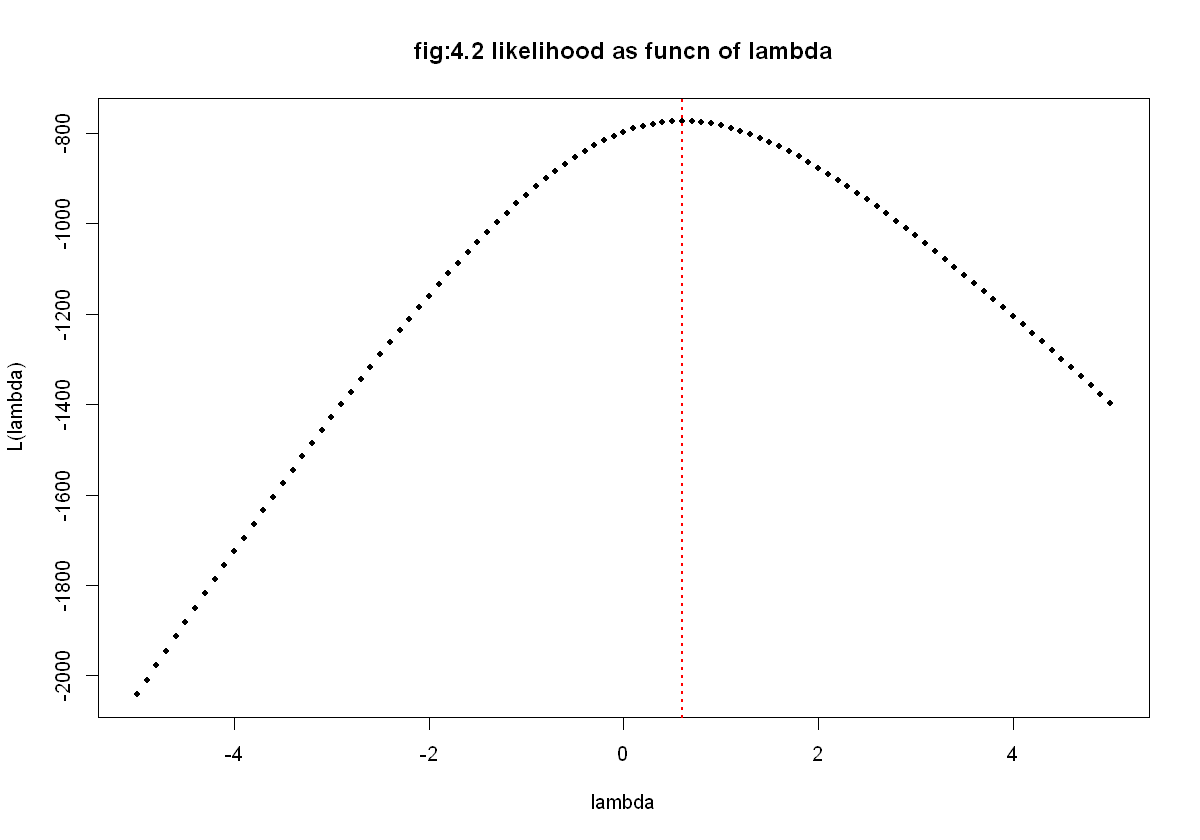

In [421]:
#Looking at the qq plot we find that all the points are not in straight line 
#So, Performing Box-Cox transformation. So, normality assumption of error is not verified 
#4(b)Box-Cox Transformation
Y_train[which(Y_train<0)]    
## all values are positive
lamda=seq(from=-5, to=5, by=0.1)
Y_trans= NA
lik_fun=NA
for( i in 1:length(lamda))
{
  lam=lamda[i]
  if(lam!=0)
  {  Y_trans= (Y_train^lam - rep(1,times=n))/lam  }else
  {  Y_trans= log(Y_train)  }
  beta_hat_trans= solve(t(X_train)%*%X_train) %*% t(X_train)%*%Y_trans
  lik_fun[i]=-(n/2)*( log(2*pi) +log(sum((Y_trans-X_train%*%beta_hat_trans)^2)/n)+1) +
    (lam-1)* sum(log(Y_train))
}
plot(x=lamda, y=lik_fun, xlab = "lambda", ylab="L(lambda)", pch=20,main="fig:4.2 likelihood as funcn of lambda")

lam= lamda[which(lik_fun==max(lik_fun))]
lam
abline(v= lam, col="red", lty="dotted", lwd=2)



	Shapiro-Wilk normality test

data:  ytrain_aux
W = 0.98727, p-value = 0.005239


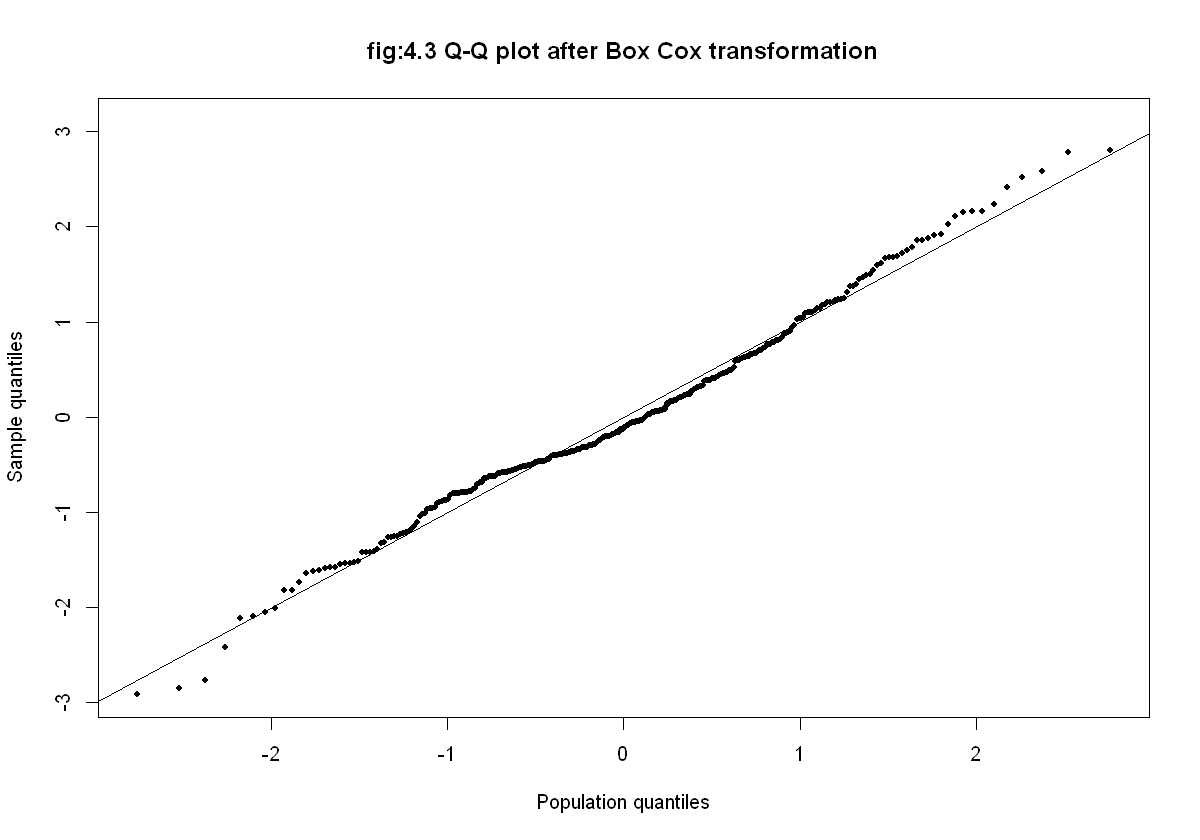

In [422]:
ytrain_aux= (Y_train^lam - rep(1,times=n))/lam
shapiro.test(ytrain_aux)
qq.plot(X_train, ytrain_aux,'fig:4.3 Q-Q plot after Box Cox transformation')

In [423]:
## normality assumption seems to have improved as thus obtained plot is closer to ideal situation. 
## thus we keep the transformation
Y_train= ytrain_aux

In [424]:
model=lm(Y_train~X_train[,-1])
coefficient=matrix(model$coefficients,nrow=length(model$coefficients),ncol=1)
Y=X_test%*%coefficient
Ynew=(0.6*Y+1)^(1/0.6)
RMSE_final=sqrt(sum((Y_test-Ynew)^2)/length(Y_test))
RMSE_final
#------------------------ THE END--------------------------------

[1] 4.924085